In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Heart Disease 2022 - Data Analysis and Prediction/Forcasting

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

hostname = os.environ['PGHOST']
username = os.environ['PGUSER']
password = os.environ['PGPASSWORD']
database = os.environ['PGDATABASE']
port = os.environ['PGPORT']

%load_ext sql
connection_string = f'postgresql://{username}:{password}@{hostname}:{port}/{database}'
%sql $connection_string

In [3]:
print(os.getenv('PGUSER'))

alee


In [4]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy.orm import Session
engine = create_engine(connection_string)
conn = engine.connect()
inspector = inspect(engine)
print(inspector.get_table_names())

['heart_disease']


In [5]:
df = pd.read_sql("SELECT * FROM heart_disease", conn)
df

,state,sex,generalhealth,physicalhealthdays,mentalhealthdays,lastcheckuptime,physicalactivities,sleephours,removedteeth,hadheartattack,...,heightinmeters,weightinkilograms,bmi,alcoholdrinkers,hivtesting,fluvaxlast12,pneumovaxever,tetanuslast10tdap,highrisklastyear,covidpos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [6]:
# Checking for nulls - No nulls
# df.isnull().sum()

In [7]:
# Columns: 40, Rows: 246022
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   state                      246022 non-null  object 
 1   sex                        246022 non-null  object 
 2   generalhealth              246022 non-null  object 
 3   physicalhealthdays         246022 non-null  float64
 4   mentalhealthdays           246022 non-null  float64
 5   lastcheckuptime            246022 non-null  object 
 6   physicalactivities         246022 non-null  object 
 7   sleephours                 246022 non-null  float64
 8   removedteeth               246022 non-null  object 
 9   hadheartattack             246022 non-null  object 
 10  hadangina                  246022 non-null  object 
 11  hadstroke                  246022 non-null  object 
 12  hadasthma                  246022 non-null  object 
 13  hadskincancer              24

In [8]:
df['hadheartattack'].value_counts(normalize=True)

hadheartattack
No     0.945391
Yes    0.054609
Name: proportion, dtype: float64

In [9]:
# Create list of columns
columns_list = list(df.columns)
columns_list

['state',
 'sex',
 'generalhealth',
 'physicalhealthdays',
 'mentalhealthdays',
 'lastcheckuptime',
 'physicalactivities',
 'sleephours',
 'removedteeth',
 'hadheartattack',
 'hadangina',
 'hadstroke',
 'hadasthma',
 'hadskincancer',
 'hadcopd',
 'haddepressivedisorder',
 'hadkidneydisease',
 'hadarthritis',
 'haddiabetes',
 'deaforhardofhearing',
 'blindorvisiondifficulty',
 'difficultyconcentrating',
 'difficultywalking',
 'difficultydressingbathing',
 'difficultyerrands',
 'smokerstatus',
 'ecigaretteusage',
 'chestscan',
 'raceethnicitycategory',
 'agecategory',
 'heightinmeters',
 'weightinkilograms',
 'bmi',
 'alcoholdrinkers',
 'hivtesting',
 'fluvaxlast12',
 'pneumovaxever',
 'tetanuslast10tdap',
 'highrisklastyear',
 'covidpos']

In [10]:
object_columns = df.select_dtypes(include='object')
numeric_columns = df.select_dtypes(exclude='object')

In [11]:
object_columns.columns

Index(['state', 'sex', 'generalhealth', 'lastcheckuptime',
       'physicalactivities', 'removedteeth', 'hadheartattack', 'hadangina',
       'hadstroke', 'hadasthma', 'hadskincancer', 'hadcopd',
       'haddepressivedisorder', 'hadkidneydisease', 'hadarthritis',
       'haddiabetes', 'deaforhardofhearing', 'blindorvisiondifficulty',
       'difficultyconcentrating', 'difficultywalking',
       'difficultydressingbathing', 'difficultyerrands', 'smokerstatus',
       'ecigaretteusage', 'chestscan', 'raceethnicitycategory', 'agecategory',
       'alcoholdrinkers', 'hivtesting', 'fluvaxlast12', 'pneumovaxever',
       'tetanuslast10tdap', 'highrisklastyear', 'covidpos'],
      dtype='object')

In [12]:
numeric_columns.columns

Index(['physicalhealthdays', 'mentalhealthdays', 'sleephours',
       'heightinmeters', 'weightinkilograms', 'bmi'],
      dtype='object')

<Axes: title={'center': 'General Health'}, ylabel='generalhealth'>

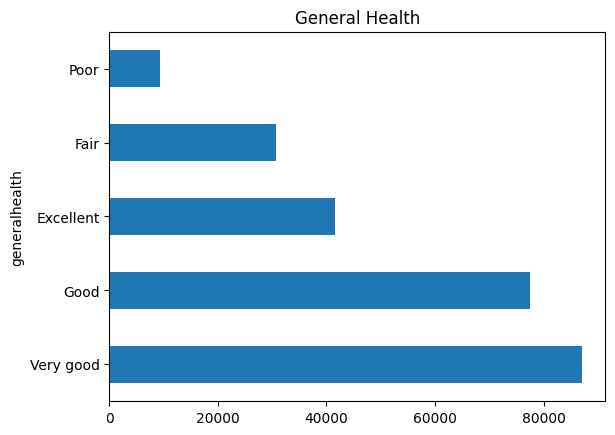

In [13]:
df['generalhealth'].value_counts().plot(kind='barh', title='General Health')

## Train Test Split

In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()

for column in object_columns.columns:
    df[column] = encoder.fit_transform(df[column])

df

,state,sex,generalhealth,physicalhealthdays,mentalhealthdays,lastcheckuptime,physicalactivities,sleephours,removedteeth,hadheartattack,...,heightinmeters,weightinkilograms,bmi,alcoholdrinkers,hivtesting,fluvaxlast12,pneumovaxever,tetanuslast10tdap,highrisklastyear,covidpos
0,0,0,4,4.0,0.0,3,1,9.0,3,0,...,1.60,71.67,27.99,0,0,1,1,1,0,0
1,0,1,4,0.0,0.0,3,1,6.0,3,0,...,1.78,95.25,30.13,0,0,1,1,2,0,0
2,0,1,4,0.0,0.0,3,0,8.0,1,0,...,1.85,108.86,31.66,1,0,0,1,0,0,2
3,0,0,1,5.0,0.0,3,1,9.0,3,0,...,1.70,90.72,31.32,0,0,1,1,0,0,2
4,0,0,2,3.0,15.0,3,1,5.0,0,0,...,1.55,79.38,33.07,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,48,1,4,0.0,0.0,1,1,6.0,3,0,...,1.78,102.06,32.28,1,0,0,0,2,0,0
246018,48,0,1,0.0,7.0,3,1,7.0,3,0,...,1.93,90.72,24.34,0,0,0,0,0,0,2
246019,48,1,2,0.0,15.0,3,1,7.0,0,0,...,1.68,83.91,29.86,1,1,1,1,2,0,2
246020,48,0,0,2.0,2.0,3,1,7.0,3,0,...,1.70,83.01,28.66,0,1,1,0,2,0,0


In [16]:
TRAIN = df.drop('hadheartattack', axis=1)
TARGET = df['hadheartattack']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(TRAIN, TARGET, test_size=0.2, random_state=42, stratify=df['hadheartattack'])
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(196817, 39) (49205, 39) (196817,) (49205,)


In [18]:
classifier = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.05)
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(classifier, TRAIN, TARGET, cv=3)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [0.94443225 0.94802883 0.94810199]
Mean Cross-Validation Score: 0.9468543562043464


In [19]:
# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb

# # Define the parameter grid
# param_grid = {
#     'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100]
# }

# # Create the XGBoost classifier
# classifier = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.05)

# # Create the GridSearchCV object
# grid_search = GridSearchCV(classifier, param_grid, cv=3)

# # Fit the grid search to the training data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)


In [20]:
classifier.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=50, verbose=True)
classifier.score(X_test, y_test)

/Users/alee/opt/anaconda3/envs/tensorflow_env/lib/python3.9/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.24488	validation_1-logloss:0.24503
[1]	validation_0-logloss:0.23767	validation_1-logloss:0.23792
[2]	validation_0-logloss:0.23114	validation_1-logloss:0.23151
[3]	validation_0-logloss:0.22516	validation_1-logloss:0.22562
[4]	validation_0-logloss:0.21968	validation_1-logloss:0.22023
[5]	validation_0-logloss:0.21462	validation_1-logloss:0.21529
[6]	validation_0-logloss:0.20994	validation_1-logloss:0.21068
[7]	validation_0-logloss:0.20562	validation_1-logloss:0.20643
[8]	validation_0-logloss:0.20157	validation_1-logloss:0.20246
[9]	validation_0-logloss:0.19781	validation_1-logloss:0.19877
[10]	validation_0-logloss:0.19431	validation_1-logloss:0.19533
[11]	validation_0-logloss:0.19106	validation_1-logloss:0.19214
[12]	validation_0-logloss:0.18803	validation_1-logloss:0.18914
[13]	validation_0-logloss:0.18519	validation_1-logloss:0.18638
[14]	validation_0-logloss:0.18254	validation_1-logloss:0.18381
[15]	validation_0-logloss:0.18004	validation_1-logloss:0.18138
[1

0.9497612031297632

In [21]:
from sklearn.metrics import classification_report

y_pred = classifier.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46518
           1       0.60      0.23      0.33      2687

    accuracy                           0.95     49205
   macro avg       0.78      0.61      0.65     49205
weighted avg       0.94      0.95      0.94     49205



In [22]:
classifier.feature_importances_

array([0.00426938, 0.01698537, 0.01380624, 0.00529451, 0.00416793,
       0.00476607, 0.00525267, 0.00503813, 0.0131457 , 0.627105  ,
       0.0402413 , 0.0044176 , 0.00548111, 0.00761297, 0.00406033,
       0.00612891, 0.00500213, 0.01284536, 0.00573947, 0.00556915,
       0.00595617, 0.01702553, 0.00399222, 0.00506846, 0.01017927,
       0.00455205, 0.07497612, 0.00506254, 0.02935067, 0.00417575,
       0.00449526, 0.00443358, 0.00916369, 0.00415735, 0.00419149,
       0.00441665, 0.00375272, 0.00379882, 0.00432238], dtype=float32)

In [23]:
feature_importances = pd.DataFrame(classifier.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

<Axes: title={'center': 'Feature Importance'}>

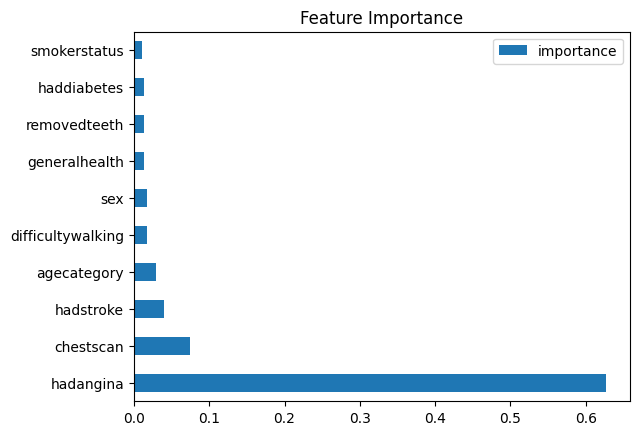

In [24]:
feature_importances.iloc[:10].plot(kind='barh', title='Feature Importance')